In [67]:
# 기본적 modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family'] ='Malgun Gothic'

matplotlib.rcParams['axes.unicode_minus'] =False
import seaborn as sns

# 회귀분석 modules
import statsmodels.api as sm
from scipy.stats import skew, kurtosis
from sklearn.linear_model import LogisticRegression
from scipy.stats.mstats import winsorize

# 머신러닝 modules

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV

# plotly 버전문제 해결 코드
import plotly.offline as pyo 
import plotly.graph_objects as go
pyo.init_notebook_mode()

# warnings 무시
import warnings
warnings.filterwarnings('ignore')

In [2]:
test= pd.read_csv('./11_13_이자(더미종합).csv', encoding='CP949')


# 정상기간 데이터
## 16~18 데이터

### 16~18 외감 이자보상배율 기준 가져오기

In [3]:
# 자료 불러오기(천단위 쉼표 제거하고 정수로 불러오기)
normal_1618 = pd.read_csv('./07_09_영손(더미종합).csv', encoding='CP949')
normal_1618.head(5)

구분  총자산증가율2009  유동자산증가율2009  매출액증가율2009  매출액순이익률2009  \
0  (주)TS푸드앤시스템    0.246869    -0.082514    0.229239     0.009565   
1    (주)강앤파트너스   -0.341918    -0.350626    5.236694     0.181215   
2      (주)경인일보   -0.026340    -0.082369    0.004144    -0.044152   
3        (주)고산    0.138273     0.521267   -0.201398     0.024684   
4      (주)광성전자   -0.720537    -0.410090   -0.348750    -0.354951   

   매출원가대매출액비율2009  자기자본순이익률2009  총자산순이익률2009  매출액대판매관리비2009  매출채권회전율2009  ...  \
0        0.777668      0.054002     0.015964       0.194101     5.188933  ...   
1        0.774452      0.183702     0.175809       0.086404     1.914677  ...   
2        0.641471     -0.065238    -0.037466       0.400956     3.786620  ...   
3        0.893039      0.032346     0.016792       0.105265     4.441798  ...   
4        0.883311     -0.059076    -0.056707       0.493663     4.109896  ...   

   부채/매출액2009  부채/현금흐름2009  유동부채/부채2009  현금흐름/매출액2009  차입금평균금리2009  \
0    0.422021  -284.539586     0.819527     -0.001483         7.09   
1    0.044291     0.748088     0.109796      0.059206         1.97   
2    0.501671   644.411275     0.618639      0.000778         8.99   
3    0.706890   373.372156     0.670811      0.001893         5.90   
4    0.251098     9.729737     0.795075      0.025807         5.26   

   이자보상배율2009  매출  자산  업종  정상기업여부  
0    1.750546   2   1   1       1  
1  104.645388   1   0   1       1  
2   -1.915069   1   1   1       0  
3    0.082913   1   2   0       1  
4  -81.891340   0   0   0       0  

[5 rows x 32 columns]

<AxesSubplot:>

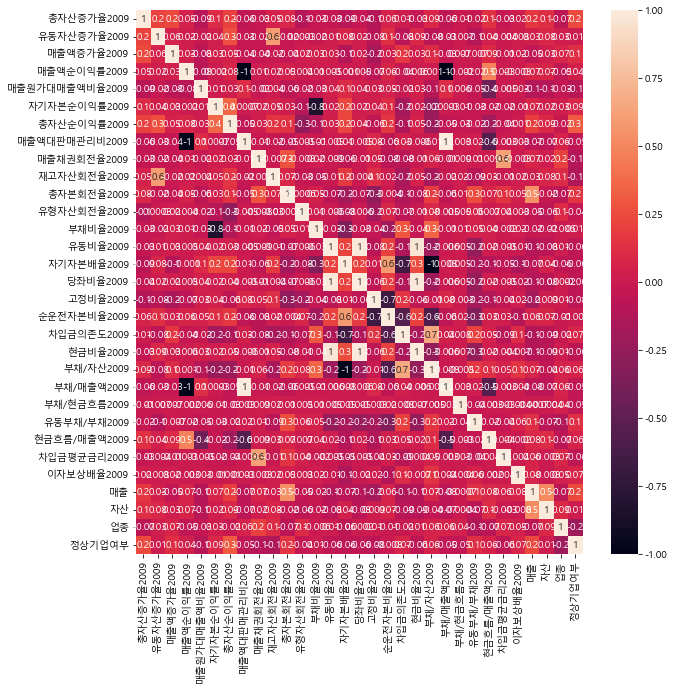

In [4]:
# 히트맵으로 시각화
corr_df = normal_1618.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_df, annot=True, fmt='.1g')

In [5]:
normal_1618.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   구분              401 non-null    object 
 1   총자산증가율2009      401 non-null    float64
 2   유동자산증가율2009     401 non-null    float64
 3   매출액증가율2009      401 non-null    float64
 4   매출액순이익률2009     401 non-null    float64
 5   매출원가대매출액비율2009  401 non-null    float64
 6   자기자본순이익률2009    401 non-null    float64
 7   총자산순이익률2009     401 non-null    float64
 8   매출액대판매관리비2009   401 non-null    float64
 9   매출채권회전율2009     401 non-null    float64
 10  재고자산회전율2009     401 non-null    float64
 11  총자본회전율2009      401 non-null    float64
 12  유형자산회전율2009     401 non-null    float64
 13  부채비율2009        401 non-null    float64
 14  유동비율2009        401 non-null    float64
 15  자기자본배율2009      401 non-null    float64
 16  당좌비율2009        401 non-null    float64
 17  고정비율2009        401 non-null    flo

In [6]:
# 빈 값 있는 지 확인
normal_1618_nasum = normal_1618.isna().sum()
normal_1618_nasum

구분                0
총자산증가율2009        0
유동자산증가율2009       0
매출액증가율2009        0
매출액순이익률2009       0
매출원가대매출액비율2009    0
자기자본순이익률2009      0
총자산순이익률2009       0
매출액대판매관리비2009     0
매출채권회전율2009       0
재고자산회전율2009       0
총자본회전율2009        0
유형자산회전율2009       0
부채비율2009          0
유동비율2009          0
자기자본배율2009        0
당좌비율2009          0
고정비율2009          0
순운전자본비율2009       0
차입금의존도2009        0
현금비율2009          0
부채/자산2009         0
부채/매출액2009        0
부채/현금흐름2009       0
유동부채/부채2009       0
현금흐름/매출액2009      0
차입금평균금리2009       0
이자보상배율2009        0
매출                0
자산                0
업종                0
정상기업여부            0
dtype: int64

In [7]:
# null값 제거한 데이터
print('### 18년 이자보상배율 기준 기업 수 비교 ###')
print(f"총 기업수 : {len(normal_1618)}")
print(f"회생기업 수 : {len(normal_1618[normal_1618['정상기업여부'] == 1])}")
print(f"미회생기업 수 : {len(normal_1618[normal_1618['정상기업여부'] == 0])}")

### 18년 이자보상배율 기준 기업 수 비교 ###
총 기업수 : 401
회생기업 수 : 185
미회생기업 수 : 216


In [8]:
# inf 값 확인

normal_1618[normal_1618.isin([np.inf, -np.inf]).any(1)]

Empty DataFrame
Columns: [구분, 총자산증가율2009, 유동자산증가율2009, 매출액증가율2009, 매출액순이익률2009, 매출원가대매출액비율2009, 자기자본순이익률2009, 총자산순이익률2009, 매출액대판매관리비2009, 매출채권회전율2009, 재고자산회전율2009, 총자본회전율2009, 유형자산회전율2009, 부채비율2009, 유동비율2009, 자기자본배율2009, 당좌비율2009, 고정비율2009, 순운전자본비율2009, 차입금의존도2009, 현금비율2009, 부채/자산2009, 부채/매출액2009, 부채/현금흐름2009, 유동부채/부채2009, 현금흐름/매출액2009, 차입금평균금리2009, 이자보상배율2009, 매출, 자산, 업종, 정상기업여부]
Index: []

[0 rows x 32 columns]

In [9]:
# inf, -inf값 삭제
normal_1618_drop = normal_1618.replace([np.inf, -np.inf], np.nan).dropna()
normal_1618_drop

구분  총자산증가율2009  유동자산증가율2009  매출액증가율2009  매출액순이익률2009  \
0    (주)TS푸드앤시스템    0.246869    -0.082514    0.229239     0.009565   
1      (주)강앤파트너스   -0.341918    -0.350626    5.236694     0.181215   
2        (주)경인일보   -0.026340    -0.082369    0.004144    -0.044152   
3          (주)고산    0.138273     0.521267   -0.201398     0.024684   
4        (주)광성전자   -0.720537    -0.410090   -0.348750    -0.354951   
..           ...         ...          ...         ...          ...   
396      화광교역(주)    0.008848    -0.038846   -0.224235     0.069072   
397   화성포장산업주식회사   -0.197732    -0.381424    0.016016     0.005837   
398      후성산업(주)    0.104133     0.550115    0.044713     0.014565   
399    휘닉스중앙주식회사   -0.022970    -0.066578    0.043964    -0.222153   
400      희성건설(주)    0.058491     0.097048   -0.103534    -0.159364   

     매출원가대매출액비율2009  자기자본순이익률2009  총자산순이익률2009  매출액대판매관리비2009  매출채권회전율2009  \
0          0.777668      0.054002     0.015964       0.194101     5.188933   
1          0.774452      0.183702     0.175809       0.086404     1.914677   
2          0.641471     -0.065238    -0.037466       0.400956     3.786620   
3          0.893039      0.032346     0.016792       0.105265     4.441798   
4          0.883311     -0.059076    -0.056707       0.493663     4.109896   
..              ...           ...          ...            ...          ...   
396        0.493086      0.136109     0.070697       0.463747    12.300357   
397        0.865844      0.028517     0.008528       0.111463     7.304180   
398        0.864782      0.278640     0.028378       0.121574    10.856580   
399        0.103847     -0.174479    -0.034112       0.877691    14.314214   
400        0.787365     -0.492640    -0.076086       0.268882     0.694196   

     ...  부채/매출액2009  부채/현금흐름2009  유동부채/부채2009  현금흐름/매출액2009  차입금평균금리2009  \
0    ...    0.422021  -284.539586     0.819527     -0.001483         7.09   
1    ...    0.044291     0.748088     0.109796      0.059206         1.97   
2    ...    0.501671   644.411275     0.618639      0.000778         8.99   
3    ...    0.706890   373.372156     0.670811      0.001893         5.90   
4    ...    0.251098     9.729737     0.795075      0.025807         5.26   
..   ...         ...          ...          ...           ...          ...   
396  ...    0.469542    19.441904     0.824467      0.024151         6.64   
397  ...    0.479702   -11.167798     0.851395     -0.042954         6.54   
398  ...    0.460982   103.882232     0.975755      0.004438         6.69   
399  ...    5.239212 -3251.783380     0.356805     -0.001611         7.56   
400  ...    1.771042    45.319900     0.982696      0.039079         8.34   

     이자보상배율2009  매출  자산  업종  정상기업여부  
0      1.750546   2   1   1       1  
1    104.645388   1   0   1       1  
2     -1.915069   1   1   1       0  
3      0.082913   1   2   0       1  
4    -81.891340   0   0   0       0  
..          ...  ..  ..  ..     ...  
396    2.177371   1   1   1       1  
397    1.303208   1   0   0       1  
398    1.334453   2   1   0       1  
399    0.144721   2   2   1       1  
400   -1.483122   1   1   1       0  

[401 rows x 32 columns]

In [10]:
# inf, -inf 삭제 후 분석 사용할 최종 데이터
print('### 18년 이자보상배율 기준 기업 수 비교 ###')
print(f"총 기업수 : {len(normal_1618_drop)}")
print(f"회생기업 수 : {len(normal_1618_drop[normal_1618_drop['정상기업여부'] == 1])}")
print(f"미회생기업 수 : {len(normal_1618_drop[normal_1618_drop['정상기업여부'] == 0])}")

### 18년 이자보상배율 기준 기업 수 비교 ###
총 기업수 : 401
회생기업 수 : 185
미회생기업 수 : 216


In [11]:
# 회사명(구분)을 index로 바꾸기
normal_1618_df = normal_1618_drop.set_index(['구분'])
normal_1618_df

총자산증가율2009  유동자산증가율2009  매출액증가율2009  매출액순이익률2009  매출원가대매출액비율2009  \
구분                                                                              
(주)TS푸드앤시스템    0.246869    -0.082514    0.229239     0.009565        0.777668   
(주)강앤파트너스     -0.341918    -0.350626    5.236694     0.181215        0.774452   
(주)경인일보       -0.026340    -0.082369    0.004144    -0.044152        0.641471   
(주)고산          0.138273     0.521267   -0.201398     0.024684        0.893039   
(주)광성전자       -0.720537    -0.410090   -0.348750    -0.354951        0.883311   
...                 ...          ...         ...          ...             ...   
화광교역(주)        0.008848    -0.038846   -0.224235     0.069072        0.493086   
화성포장산업주식회사    -0.197732    -0.381424    0.016016     0.005837        0.865844   
후성산업(주)        0.104133     0.550115    0.044713     0.014565        0.864782   
휘닉스중앙주식회사     -0.022970    -0.066578    0.043964    -0.222153        0.103847   
희성건설(주)        0.058491     0.097048   -0.103534    -0.159364        0.787365   

             자기자본순이익률2009  총자산순이익률2009  매출액대판매관리비2009  매출채권회전율2009  \
구분                                                                   
(주)TS푸드앤시스템      0.054002     0.015964       0.194101     5.188933   
(주)강앤파트너스        0.183702     0.175809       0.086404     1.914677   
(주)경인일보         -0.065238    -0.037466       0.400956     3.786620   
(주)고산            0.032346     0.016792       0.105265     4.441798   
(주)광성전자         -0.059076    -0.056707       0.493663     4.109896   
...                   ...          ...            ...          ...   
화광교역(주)          0.136109     0.070697       0.463747    12.300357   
화성포장산업주식회사       0.028517     0.008528       0.111463     7.304180   
후성산업(주)          0.278640     0.028378       0.121574    10.856580   
휘닉스중앙주식회사       -0.174479    -0.034112       0.877691    14.314214   
희성건설(주)         -0.492640    -0.076086       0.268882     0.694196   

             재고자산회전율2009  ...  부채/매출액2009  부채/현금흐름2009  유동부채/부채2009  \
구분                        ...                                         
(주)TS푸드앤시스템    15.170488  ...    0.422021  -284.539586     0.819527   
(주)강앤파트너스       3.938790  ...    0.044291     0.748088     0.109796   
(주)경인일보       230.335234  ...    0.501671   644.411275     0.618639   
(주)고산          12.896059  ...    0.706890   373.372156     0.670811   
(주)광성전자        21.000865  ...    0.251098     9.729737     0.795075   
...                  ...  ...         ...          ...          ...   
화광교역(주)        34.866057  ...    0.469542    19.441904     0.824467   
화성포장산업주식회사      8.400570  ...    0.479702   -11.167798     0.851395   
후성산업(주)        33.529656  ...    0.460982   103.882232     0.975755   
휘닉스중앙주식회사       4.135304  ...    5.239212 -3251.783380     0.356805   
희성건설(주)         2.553777  ...    1.771042    45.319900     0.982696   

             현금흐름/매출액2009  차입금평균금리2009  이자보상배율2009  매출  자산  업종  정상기업여부  
구분                                                                      
(주)TS푸드앤시스템     -0.001483         7.09    1.750546   2   1   1       1  
(주)강앤파트너스        0.059206         1.97  104.645388   1   0   1       1  
(주)경인일보          0.000778         8.99   -1.915069   1   1   1       0  
(주)고산            0.001893         5.90    0.082913   1   2   0       1  
(주)광성전자          0.025807         5.26  -81.891340   0   0   0       0  
...                   ...          ...         ...  ..  ..  ..     ...  
화광교역(주)          0.024151         6.64    2.177371   1   1   1       1  
화성포장산업주식회사      -0.042954         6.54    1.303208   1   0   0       1  
후성산업(주)          0.004438         6.69    1.334453   2   1   0       1  
휘닉스중앙주식회사       -0.001611         7.56    0.144721   2   2   1       1  
희성건설(주)          0.039079         8.34   -1.483122   1   1   1       0  

[401 rows x 31 columns]

array([[<AxesSubplot:title={'center':'총자산증가율2009'}>,
        <AxesSubplot:title={'center':'유동자산증가율2009'}>,
        <AxesSubplot:title={'center':'매출액증가율2009'}>,
        <AxesSubplot:title={'center':'매출액순이익률2009'}>,
        <AxesSubplot:title={'center':'매출원가대매출액비율2009'}>,
        <AxesSubplot:title={'center':'자기자본순이익률2009'}>],
       [<AxesSubplot:title={'center':'총자산순이익률2009'}>,
        <AxesSubplot:title={'center':'매출액대판매관리비2009'}>,
        <AxesSubplot:title={'center':'매출채권회전율2009'}>,
        <AxesSubplot:title={'center':'재고자산회전율2009'}>,
        <AxesSubplot:title={'center':'총자본회전율2009'}>,
        <AxesSubplot:title={'center':'유형자산회전율2009'}>],
       [<AxesSubplot:title={'center':'부채비율2009'}>,
        <AxesSubplot:title={'center':'유동비율2009'}>,
        <AxesSubplot:title={'center':'자기자본배율2009'}>,
        <AxesSubplot:title={'center':'당좌비율2009'}>,
        <AxesSubplot:title={'center':'고정비율2009'}>,
        <AxesSubplot:title={'center':'순운전자본비율2009'}>],
       [<AxesSubplot:title={'center

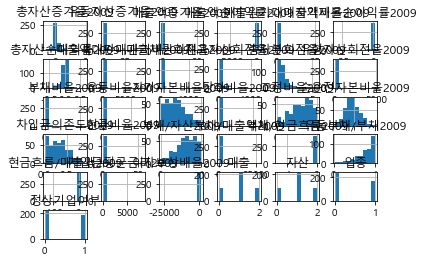

In [12]:
normal_1618_df.hist()

총자산증가율2009의 # 왜도 : 2.53  # 첨도 : 16.91
유동자산증가율2009의 # 왜도 : 18.46  # 첨도 : 355.88
매출액증가율2009의 # 왜도 : 9.06  # 첨도 : 100.13
매출액순이익률2009의 # 왜도 : -19.75  # 첨도 : 390.97
매출원가대매출액비율2009의 # 왜도 : 14.95  # 첨도 : 245.88


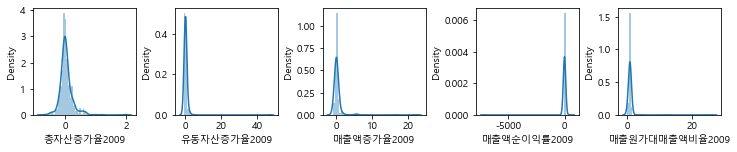

In [13]:
# distplot 분포 탐색
plt.rcParams["figure.figsize"] = (10,2)
fig, axes = plt.subplots(1,5, constrained_layout=True)

for i in range(0,5,1):
    sns.distplot(normal_1618_df.iloc[:,i], ax = axes[i])
    print(f'{normal_1618_df.columns[i]}의 # 왜도 : {np.round(skew(normal_1618_df.iloc[:,i]),2)}  # 첨도 : {np.round(kurtosis(normal_1618_df.iloc[:,i]),2)}')
plt.show()

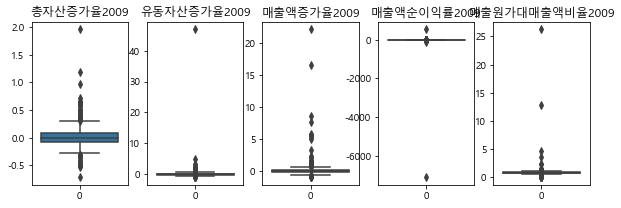

In [14]:
# 전체 박스플롯으로 이상치 탐색
plt.rcParams["figure.figsize"] = (10,3)
fig, axes = plt.subplots(1,5)

for i in range(0,5,1):
    sns.boxplot(data =(normal_1618_df).iloc[:,i], orient="v", ax = axes[i])
    axes[i].set_title(normal_1618_df.columns[i])
plt.show()

In [15]:
# 피쳐와 타겟값 분리
normal_1618_target = normal_1618_df['정상기업여부']
normal_1618_features = normal_1618_df.drop(['정상기업여부'], axis=1)
normal_1618_features

총자산증가율2009  유동자산증가율2009  매출액증가율2009  매출액순이익률2009  매출원가대매출액비율2009  \
구분                                                                              
(주)TS푸드앤시스템    0.246869    -0.082514    0.229239     0.009565        0.777668   
(주)강앤파트너스     -0.341918    -0.350626    5.236694     0.181215        0.774452   
(주)경인일보       -0.026340    -0.082369    0.004144    -0.044152        0.641471   
(주)고산          0.138273     0.521267   -0.201398     0.024684        0.893039   
(주)광성전자       -0.720537    -0.410090   -0.348750    -0.354951        0.883311   
...                 ...          ...         ...          ...             ...   
화광교역(주)        0.008848    -0.038846   -0.224235     0.069072        0.493086   
화성포장산업주식회사    -0.197732    -0.381424    0.016016     0.005837        0.865844   
후성산업(주)        0.104133     0.550115    0.044713     0.014565        0.864782   
휘닉스중앙주식회사     -0.022970    -0.066578    0.043964    -0.222153        0.103847   
희성건설(주)        0.058491     0.097048   -0.103534    -0.159364        0.787365   

             자기자본순이익률2009  총자산순이익률2009  매출액대판매관리비2009  매출채권회전율2009  \
구분                                                                   
(주)TS푸드앤시스템      0.054002     0.015964       0.194101     5.188933   
(주)강앤파트너스        0.183702     0.175809       0.086404     1.914677   
(주)경인일보         -0.065238    -0.037466       0.400956     3.786620   
(주)고산            0.032346     0.016792       0.105265     4.441798   
(주)광성전자         -0.059076    -0.056707       0.493663     4.109896   
...                   ...          ...            ...          ...   
화광교역(주)          0.136109     0.070697       0.463747    12.300357   
화성포장산업주식회사       0.028517     0.008528       0.111463     7.304180   
후성산업(주)          0.278640     0.028378       0.121574    10.856580   
휘닉스중앙주식회사       -0.174479    -0.034112       0.877691    14.314214   
희성건설(주)         -0.492640    -0.076086       0.268882     0.694196   

             재고자산회전율2009  ...  부채/자산2009  부채/매출액2009  부채/현금흐름2009  \
구분                        ...                                       
(주)TS푸드앤시스템    15.170488  ...   0.704373    0.422021  -284.539586   
(주)강앤파트너스       3.938790  ...   0.042970    0.044291     0.748088   
(주)경인일보       230.335234  ...   0.425700    0.501671   644.411275   
(주)고산          12.896059  ...   0.480877    0.706890   373.372156   
(주)광성전자        21.000865  ...   0.040115    0.251098     9.729737   
...                  ...  ...        ...         ...          ...   
화광교역(주)        34.866057  ...   0.480587    0.469542    19.441904   
화성포장산업주식회사      8.400570  ...   0.700935    0.479702   -11.167798   
후성산업(주)        33.529656  ...   0.898154    0.460982   103.882232   
휘닉스중앙주식회사       4.135304  ...   0.804492    5.239212 -3251.783380   
희성건설(주)         2.553777  ...   0.845555    1.771042    45.319900   

             유동부채/부채2009  현금흐름/매출액2009  차입금평균금리2009  이자보상배율2009  매출  자산  업종  
구분                                                                           
(주)TS푸드앤시스템     0.819527     -0.001483         7.09    1.750546   2   1   1  
(주)강앤파트너스       0.109796      0.059206         1.97  104.645388   1   0   1  
(주)경인일보         0.618639      0.000778         8.99   -1.915069   1   1   1  
(주)고산           0.670811      0.001893         5.90    0.082913   1   2   0  
(주)광성전자         0.795075      0.025807         5.26  -81.891340   0   0   0  
...                  ...           ...          ...         ...  ..  ..  ..  
화광교역(주)         0.824467      0.024151         6.64    2.177371   1   1   1  
화성포장산업주식회사      0.851395     -0.042954         6.54    1.303208   1   0   0  
후성산업(주)         0.975755      0.004438         6.69    1.334453   2   1   0  
휘닉스중앙주식회사       0.356805     -0.001611         7.56    0.144721   2   2   1  
희성건설(주)         0.982696      0.039079         8.34   -1.483122   1   1   1  

[401 rows x 30 columns]

In [16]:
# 윈저라이징 후 다시 데이터 프레임 변환

normal_1618_win = []
for i in range(len(normal_1618_features.columns)):
  dt = winsorize(normal_1618_features.iloc[:,i], limits=[0.005, 0.005])
  normal_1618_win.append(np.ma.getdata(dt))
  # print(normal_1618_win)

normal_1618_win_df = pd.DataFrame(data=normal_1618_win, index=normal_1618_features.columns, columns=normal_1618_features.index).transpose()
normal_1618_win_df

총자산증가율2009  유동자산증가율2009  매출액증가율2009  매출액순이익률2009  매출원가대매출액비율2009  \
구분                                                                              
(주)TS푸드앤시스템    0.246869    -0.082514    0.229239     0.009565        0.777668   
(주)강앤파트너스     -0.341918    -0.350626    5.236694     0.181215        0.774452   
(주)경인일보       -0.026340    -0.082369    0.004144    -0.044152        0.641471   
(주)고산          0.138273     0.521267   -0.201398     0.024684        0.893039   
(주)광성전자       -0.509558    -0.410090   -0.348750    -0.354951        0.883311   
...                 ...          ...         ...          ...             ...   
화광교역(주)        0.008848    -0.038846   -0.224235     0.069072        0.493086   
화성포장산업주식회사    -0.197732    -0.381424    0.016016     0.005837        0.865844   
후성산업(주)        0.104133     0.550115    0.044713     0.014565        0.864782   
휘닉스중앙주식회사     -0.022970    -0.066578    0.043964    -0.222153        0.103847   
희성건설(주)        0.058491     0.097048   -0.103534    -0.159364        0.787365   

             자기자본순이익률2009  총자산순이익률2009  매출액대판매관리비2009  매출채권회전율2009  \
구분                                                                   
(주)TS푸드앤시스템      0.054002     0.015964       0.194101     5.188933   
(주)강앤파트너스        0.183702     0.175809       0.086404     1.914677   
(주)경인일보         -0.065238    -0.037466       0.400956     3.786620   
(주)고산            0.032346     0.016792       0.105265     4.441798   
(주)광성전자         -0.059076    -0.056707       0.493663     4.109896   
...                   ...          ...            ...          ...   
화광교역(주)          0.136109     0.070697       0.463747    12.300357   
화성포장산업주식회사       0.028517     0.008528       0.111463     7.304180   
후성산업(주)          0.278640     0.028378       0.121574    10.856580   
휘닉스중앙주식회사       -0.174479    -0.034112       0.877691    14.314214   
희성건설(주)         -0.492640    -0.076086       0.268882     0.694196   

             재고자산회전율2009  ...  부채/자산2009  부채/매출액2009  부채/현금흐름2009  \
구분                        ...                                       
(주)TS푸드앤시스템    15.170488  ...   0.704373    0.422021  -284.539586   
(주)강앤파트너스       3.938790  ...   0.042970    0.092935     0.748088   
(주)경인일보       230.335234  ...   0.425700    0.501671   644.411275   
(주)고산          12.896059  ...   0.480877    0.706890   373.372156   
(주)광성전자        21.000865  ...   0.040115    0.251098     9.729737   
...                  ...  ...        ...         ...          ...   
화광교역(주)        34.866057  ...   0.480587    0.469542    19.441904   
화성포장산업주식회사      8.400570  ...   0.700935    0.479702   -11.167798   
후성산업(주)        33.529656  ...   0.898154    0.460982   103.882232   
휘닉스중앙주식회사       4.135304  ...   0.804492    5.239212 -3251.783380   
희성건설(주)         2.553777  ...   0.845555    1.771042    45.319900   

             유동부채/부채2009  현금흐름/매출액2009  차입금평균금리2009  이자보상배율2009   매출   자산   업종  
구분                                                                              
(주)TS푸드앤시스템     0.819527     -0.001483         7.09    1.750546  2.0  1.0  1.0  
(주)강앤파트너스       0.109796      0.059206         1.97   46.145922  1.0  0.0  1.0  
(주)경인일보         0.618639      0.000778         8.99   -1.915069  1.0  1.0  1.0  
(주)고산           0.670811      0.001893         5.90    0.082913  1.0  2.0  0.0  
(주)광성전자         0.795075      0.025807         5.26  -81.891340  0.0  0.0  0.0  
...                  ...           ...          ...         ...  ...  ...  ...  
화광교역(주)         0.824467      0.024151         6.64    2.177371  1.0  1.0  1.0  
화성포장산업주식회사      0.851395     -0.042954         6.54    1.303208  1.0  0.0  0.0  
후성산업(주)         0.975755      0.004438         6.69    1.334453  2.0  1.0  0.0  
휘닉스중앙주식회사       0.356805     -0.001611         7.56    0.144721  2.0  2.0  1.0  
희성건설(주)         0.982696      0.039079         8.34   -1.483122  1.0  1.0  1.0  

[401 rows x 30 columns]

In [17]:
normal_1618_target

구분
(주)TS푸드앤시스템    1
(주)강앤파트너스      1
(주)경인일보        0
(주)고산          1
(주)광성전자        0
              ..
화광교역(주)        1
화성포장산업주식회사     1
후성산업(주)        1
휘닉스중앙주식회사      1
희성건설(주)        0
Name: 정상기업여부, Length: 401, dtype: int64

array([[<AxesSubplot:title={'center':'총자산증가율2009'}>,
        <AxesSubplot:title={'center':'유동자산증가율2009'}>,
        <AxesSubplot:title={'center':'매출액증가율2009'}>,
        <AxesSubplot:title={'center':'매출액순이익률2009'}>,
        <AxesSubplot:title={'center':'매출원가대매출액비율2009'}>],
       [<AxesSubplot:title={'center':'자기자본순이익률2009'}>,
        <AxesSubplot:title={'center':'총자산순이익률2009'}>,
        <AxesSubplot:title={'center':'매출액대판매관리비2009'}>,
        <AxesSubplot:title={'center':'매출채권회전율2009'}>,
        <AxesSubplot:title={'center':'재고자산회전율2009'}>],
       [<AxesSubplot:title={'center':'총자본회전율2009'}>,
        <AxesSubplot:title={'center':'유형자산회전율2009'}>,
        <AxesSubplot:title={'center':'부채비율2009'}>,
        <AxesSubplot:title={'center':'유동비율2009'}>,
        <AxesSubplot:title={'center':'자기자본배율2009'}>],
       [<AxesSubplot:title={'center':'당좌비율2009'}>,
        <AxesSubplot:title={'center':'고정비율2009'}>,
        <AxesSubplot:title={'center':'순운전자본비율2009'}>,
        <AxesSubplot:title={'center

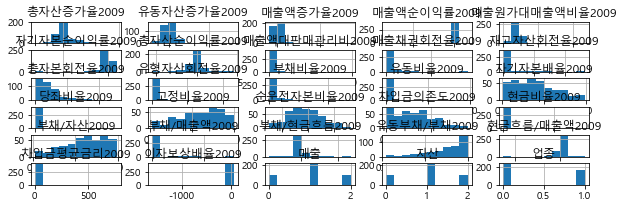

In [18]:
normal_1618_win_df.hist()

총자산증가율2009의 # 왜도 : 1.34  # 첨도 : 4.52
유동자산증가율2009의 # 왜도 : 2.8  # 첨도 : 11.78
매출액증가율2009의 # 왜도 : 5.39  # 첨도 : 33.2
매출액순이익률2009의 # 왜도 : -6.37  # 첨도 : 42.63
매출원가대매출액비율2009의 # 왜도 : 5.32  # 첨도 : 43.21


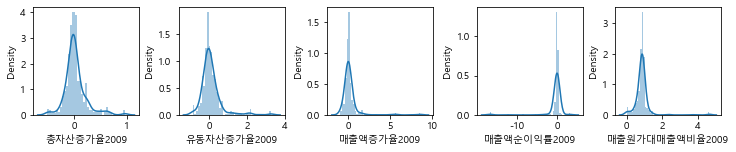

In [19]:
# distplot 분포 탐색
plt.rcParams["figure.figsize"] = (10,2)
fig, axes = plt.subplots(1,5, constrained_layout=True)

for i in range(0,5,1):
    sns.distplot(normal_1618_win_df.iloc[:,i], ax = axes[i])
    print(f'{normal_1618_win_df.columns[i]}의 # 왜도 : {np.round(skew(normal_1618_win_df.iloc[:,i]),2)}  # 첨도 : {np.round(kurtosis(normal_1618_win_df.iloc[:,i]),2)}')
plt.show()

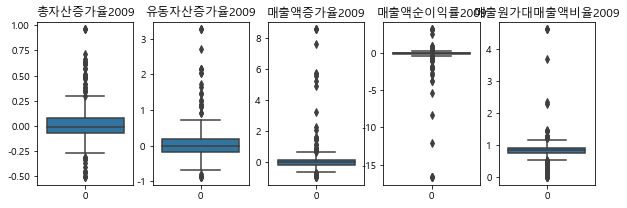

In [20]:
# 전체 박스플롯으로 이상치 탐색
plt.rcParams["figure.figsize"] = (10,3)
fig, axes = plt.subplots(1,5)

for i in range(0,5,1):
    sns.boxplot(data =(normal_1618_win_df).iloc[:,i], orient="v", ax = axes[i])
    axes[i].set_title(normal_1618_win_df.columns[i])
plt.show()

In [21]:
normal_1618_target

구분
(주)TS푸드앤시스템    1
(주)강앤파트너스      1
(주)경인일보        0
(주)고산          1
(주)광성전자        0
              ..
화광교역(주)        1
화성포장산업주식회사     1
후성산업(주)        1
휘닉스중앙주식회사      1
희성건설(주)        0
Name: 정상기업여부, Length: 401, dtype: int64

In [22]:
normal_1618_win

[array([ 2.46869313e-01, -3.41917911e-01, -2.63401753e-02,  1.38273257e-01,
        -5.09558019e-01,  9.60384300e-01,  2.03572746e-01,  4.33912345e-02,
        -7.47838545e-02, -1.62768701e-02, -4.83143385e-02,  1.39139732e-01,
         3.92075167e-02,  3.53463796e-02, -4.31699490e-02,  3.15354225e-02,
        -7.85904467e-02,  1.46297511e-01, -2.72426734e-01, -1.09241491e-01,
        -7.20777027e-02,  6.18154061e-01,  6.18154061e-01,  6.18154061e-01,
         6.18154061e-01, -9.00887884e-02, -7.26778529e-02, -1.38093557e-01,
         1.21643865e-01, -1.64374897e-01, -1.77487618e-02, -6.37766344e-02,
        -9.55658805e-02, -3.46829496e-02, -7.50603533e-03, -9.28703677e-02,
        -9.78023588e-03,  1.11680016e-02,  1.67132550e-02, -2.93617626e-02,
        -1.66833646e-01, -3.25928729e-02, -3.25928729e-02, -3.25928729e-02,
        -3.25928729e-02, -7.94225087e-02, -1.99684811e-01, -2.71837165e-02,
        -1.60676201e-01, -1.83335796e-01,  1.96552765e-02,  2.42079350e-01,
         4.1

#### 이자보상배율 빼주기

In [23]:
normal_1618_win_df1 = normal_1618_win_df.drop(['이자보상배율2009'], axis=1)
normal_1618_win_df2 = normal_1618_win_df1.drop(['부채/자산2009'], axis=1)

In [24]:
normal_1618_win_df2.corr()

총자산증가율2009  유동자산증가율2009  매출액증가율2009  매출액순이익률2009  \
총자산증가율2009        1.000000     0.571205    0.306215     0.089135   
유동자산증가율2009       0.571205     1.000000    0.260250     0.133282   
매출액증가율2009        0.306215     0.260250    1.000000    -0.052647   
매출액순이익률2009       0.089135     0.133282   -0.052647     1.000000   
매출원가대매출액비율2009   -0.099935    -0.065209   -0.140571    -0.167250   
자기자본순이익률2009      0.194814     0.139477    0.080904     0.146869   
총자산순이익률2009       0.232618     0.275337    0.083108     0.289041   
매출액대판매관리비2009    -0.152882    -0.145244   -0.080617    -0.552250   
매출채권회전율2009      -0.046274    -0.126317   -0.072363     0.061303   
재고자산회전율2009       0.020659     0.085791   -0.018285     0.085377   
총자본회전율2009        0.095099     0.073608   -0.013879     0.171982   
유형자산회전율2009      -0.020774     0.015056    0.254120    -0.008363   
부채비율2009         -0.036944    -0.002547    0.051648    -0.069853   
유동비율2009         -0.062855    -0.014266    0.138693     0.010399   
자기자본배율2009       -0.081170    -0.069414   -0.098881     0.134548   
당좌비율2009         -0.060840    -0.005903    0.138865     0.014062   
고정비율2009         -0.132378    -0.181644   -0.152685    -0.050630   
순운전자본비율2009       0.069782     0.100629    0.050670     0.057621   
차입금의존도2009        0.018061    -0.048812    0.122643    -0.131902   
현금비율2009         -0.050647     0.044378    0.158418     0.037408   
부채/매출액2009       -0.069525    -0.105033    0.013205    -0.823526   
부채/현금흐름2009      -0.016488    -0.050564    0.017249     0.016352   
유동부채/부채2009      -0.003574    -0.027039   -0.058786     0.099070   
현금흐름/매출액2009      0.175383     0.212549    0.189416     0.234218   
차입금평균금리2009      -0.130381    -0.036577   -0.063980    -0.099967   
매출                0.152210     0.138934   -0.006801     0.141985   
자산                0.114481     0.066741    0.028490    -0.011652   
업종               -0.062697    -0.123687    0.087840    -0.051117   

                매출원가대매출액비율2009  자기자본순이익률2009  총자산순이익률2009  매출액대판매관리비2009  \
총자산증가율2009           -0.099935      0.194814     0.232618      -0.152882   
유동자산증가율2009          -0.065209      0.139477     0.275337      -0.145244   
매출액증가율2009           -0.140571      0.080904     0.083108      -0.080617   
매출액순이익률2009          -0.167250      0.146869     0.289041      -0.552250   
매출원가대매출액비율2009        1.000000     -0.028349    -0.095826       0.623465   
자기자본순이익률2009         -0.028349      1.000000     0.587021      -0.002158   
총자산순이익률2009          -0.095826      0.587021     1.000000       0.024498   
매출액대판매관리비2009         0.623465     -0.002158     0.024498       1.000000   
매출채권회전율2009          -0.065324      0.042068     0.033265      -0.031208   
재고자산회전율2009           0.089013      0.078325     0.087140      -0.055047   
총자본회전율2009           -0.034185      0.078549     0.148580      -0.145684   
유형자산회전율2009          -0.054606     -0.186684    -0.177936      -0.018480   
부채비율2009             -0.058510     -0.692078    -0.170718      -0.020542   
유동비율2009              0.085367      0.035637     0.074854       0.022262   
자기자본배율2009            0.124082      0.318236     0.219541       0.071357   
당좌비율2009              0.083971      0.039281     0.080166       0.021200   
고정비율2009              0.054449      0.022242    -0.072878       0.087111   
순운전자본비율2009           0.013543      0.142137     0.160676      -0.000544   
차입금의존도2009           -0.028520     -0.222307    -0.140518       0.003731   
현금비율2009              0.055396      0.056784     0.102784       0.013219   
부채/매출액2009            0.364686     -0.047402    -0.063661       0.755079   
부채/현금흐름2009          -0.044831      0.002299     0.013213      -0.010652   
유동부채/부채2009           0.028466      0.018994    -0.012642      -0.065163   
현금흐름/매출액2009         -0.527684     -0.033133    -0.048695      -0.788128   
차입금평균금리2009           0.035556     -0.320520    -0.303452       0.015941   
매출                   -0.113318      0.148828     0.201385      -0.1

In [25]:
# statsmodels의 logit 분석을 위해 X 변수 생성
X = normal_1618_win_df2.reset_index(drop=True)
y = normal_1618_target.reset_index(drop=True)

# y 변수 배열 조정
y = np.array(y).reshape(-1,1)
y.shape

print(X)
print(X.shape)
print(y.shape)

     총자산증가율2009  유동자산증가율2009  매출액증가율2009  매출액순이익률2009  매출원가대매출액비율2009  \
0      0.246869    -0.082514    0.229239     0.009565        0.777668   
1     -0.341918    -0.350626    5.236694     0.181215        0.774452   
2     -0.026340    -0.082369    0.004144    -0.044152        0.641471   
3      0.138273     0.521267   -0.201398     0.024684        0.893039   
4     -0.509558    -0.410090   -0.348750    -0.354951        0.883311   
..          ...          ...         ...          ...             ...   
396    0.008848    -0.038846   -0.224235     0.069072        0.493086   
397   -0.197732    -0.381424    0.016016     0.005837        0.865844   
398    0.104133     0.550115    0.044713     0.014565        0.864782   
399   -0.022970    -0.066578    0.043964    -0.222153        0.103847   
400    0.058491     0.097048   -0.103534    -0.159364        0.787365   

     자기자본순이익률2009  총자산순이익률2009  매출액대판매관리비2009  매출채권회전율2009  재고자산회전율2009  ...  \
0        0.054002     0.015964       0.1941

In [26]:
# 19차 로지스틱 분석
X1 = normal_1618_win_df2.reset_index(drop=True).drop(['매출원가대매출액비율2009','매출액대판매관리비2009'],axis=1)
# 상수항 추가
X = sm.add_constant(X1)

model = sm.GLM(y, X, family=sm.families.Binomial())
results = model.fit(atol=1e-10)
print(results.summary())
print(f'AIC Score : {results.aic:.4f}')
print(results.pvalues[results.pvalues==max(results.pvalues.drop('const',axis=0))])
print(results.pvalues.index[abs(results.params)>2])

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  401
Model:                            GLM   Df Residuals:                      374
Model Family:                Binomial   Df Model:                           26
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -188.66
Date:                Wed, 06 Jul 2022   Deviance:                       377.31
Time:                        10:26:43   Pearson chi2:                     519.
No. Iterations:                     9   Pseudo R-squ. (CS):             0.3556
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -6.5871      2.655     -2.481   

# 매출액대 판관비 먼저 고려

In [27]:
X1 = normal_1618_win_df2.reset_index(drop=True)[['매출액대판매관리비2009','총자산증가율2009', '총자산순이익률2009', '자기자본배율2009', '고정비율2009','순운전자본비율2009', '유동부채/부채2009']]
X = sm.add_constant(X1)

model = sm.GLM(y, X, family=sm.families.Binomial())
results = model.fit(atol=1e-10)
print(results.summary())
print(f'AIC Score : {results.aic:.4f}')
print(results.pvalues[results.pvalues==max(results.pvalues.drop('const',axis=0))])

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  401
Model:                            GLM   Df Residuals:                      393
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -210.27
Date:                Wed, 06 Jul 2022   Deviance:                       420.54
Time:                        10:26:43   Pearson chi2:                     414.
No. Iterations:                     9   Pseudo R-squ. (CS):             0.2822
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -2.5144      1.685     -1.492

In [28]:
# 로지스틱 분석 

# 상수항 추가
p_v = 10
# 변수선언, 10이 아니여도 0.05보다 큰 값이면 상관 없습니다.

while float(0.05) < float(p_v):
    # p값이 0.05보다 크면 계속 변수가 1개씩 제거되는 반복문 코드입니다.
    X = sm.add_constant(X)

    model = sm.GLM(y, X, family=sm.families.Binomial())
    results = model.fit(atol=1e-10)
    p_v = results.pvalues[results.pvalues==max(results.pvalues.drop('const',axis=0))]
    # 여기서 p값이 가장 큰 변수가 지정됩니다.
    
    if len(p_v) == 1:
        if float(0.05) < float(p_v):  
            X.drop(p_v.index,axis=1,inplace=True)
        # p값이 가장 큰 인덱스 값을 지정하여 해당 열을 제거합니다.   
        print(results.pvalues[results.pvalues==max(results.pvalues.drop('const',axis=0))])
        print(f'AIC Score : {results.aic:.4f}')
    
    else:
        t_v = results.tvalues[results.tvalues == min(abs(results.tvalues.drop('const',axis=0)))]
        X.drop(t_v.index,axis=1,inplace=True)
        print(results.tvalues[results.tvalues==max(results.tvalues.drop('const',axis=0))])
        print(f'AIC Score : {results.aic:.4f}')
    # 이때, 지워지는 변수의 이름과 p값을 표시합니다.

print(results.summary())
# 모든 불필요한 변수가 제거된 이후 최종 모델에 대한 summary 입니다.
print(f'AIC Score : {results.aic:.4f}')
print(results.pvalues[results.pvalues==max(results.pvalues.drop('const',axis=0))])

순운전자본비율2009    0.07227
dtype: float64
AIC Score : 436.5449
고정비율2009    0.709997
dtype: float64
AIC Score : 438.1464
자기자본배율2009    0.158745
dtype: float64
AIC Score : 436.2848
유동부채/부채2009    0.054081
dtype: float64
AIC Score : 436.2898
총자산증가율2009    0.001361
dtype: float64
AIC Score : 438.0876
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  401
Model:                            GLM   Df Residuals:                      397
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -215.04
Date:                Wed, 06 Jul 2022   Deviance:                       430.09
Time:                        10:26:43   Pearson chi2:                     506.
No. Iterations:                     9   Pseudo R-squ. (CS):             0.

## 이런 식으로 p값 기준 가장 높은 변수들부터 삭제 해 주세요

### p값 삭제가 끝났다면 이제 자기상관 분석

In [29]:
# 상관성 분석
X.drop('const',axis=1,inplace=True)
corr_df = X.corr()

<AxesSubplot:>

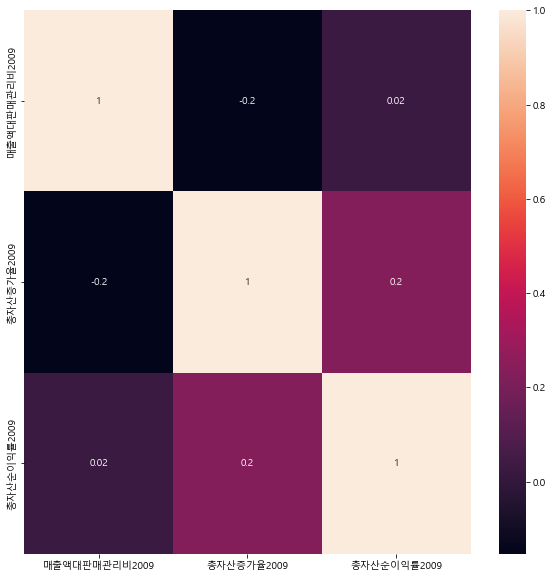

In [30]:
# 히트맵으로 시각화
plt.figure(figsize=(10,10))
sns.heatmap(corr_df, annot=True, fmt='.1g')

### 상관분석은 일단 찍어만 봐주세요 빼야할지는 나중에 결정

### 변수선정은 이제 끝입니다. 여기부턴 모델링 해보는 과정

In [31]:
# 트레인, 테스트 셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

In [32]:
# GridSearchCV를 통한 로지스틱 회귀의 최적 하이퍼 파라미터 찾기
lg_clf = LogisticRegression(random_state=9)

params = {'penalty' : ['l2', 'l1', 'elasticnet'], 'C':[0.001, 0.01, 0.1, 1, 5, 10, 100], 'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

grid_clf = GridSearchCV(lg_clf, param_grid=params, scoring='accuracy', cv=7)
grid_clf1 = GridSearchCV(lg_clf, param_grid=params, scoring='f1', cv=7)
grid_clf.fit(X, y)
grid_clf1.fit(X, y)
print(f'최적 하이퍼 파라미터 : {grid_clf.best_params_}, 최적 평균 정확도 : {np.round(grid_clf.best_score_,4)}')
print(f'최적 하이퍼 파라미터 : {grid_clf1.best_params_}, 최적 평균 F1스코어 : {np.round(grid_clf1.best_score_,4)}')

최적 하이퍼 파라미터 : {'C': 5, 'penalty': 'l1', 'solver': 'liblinear'}, 최적 평균 정확도 : 0.733
최적 하이퍼 파라미터 : {'C': 5, 'penalty': 'l1', 'solver': 'liblinear'}, 최적 평균 F1스코어 : 0.7253


In [33]:
# 파라미터 튜닝 후 다시 로지스틱

lg_clf = LogisticRegression(C=5, penalty='l1', random_state=9, solver='liblinear')
lg_clf.fit(X_train,y_train)
y_pred = lg_clf.predict(X_test)

acc_score = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('### Logistic Regression 분류 결과 ###')
print(f'ACC : {acc_score:.4f}')
print(f'Precision : {precision:.4f}')
print(f'Recall : {recall:.4f}')
print(f'F1 Score : {f1:.4f}')

### Logistic Regression 분류 결과 ###
ACC : 0.7284
Precision : 0.7647
Recall : 0.6500
F1 Score : 0.7027


총자산순이익률2009      7.335717
총자산증가율2009       1.751016
매출액대판매관리비2009   -3.442872
dtype: float64


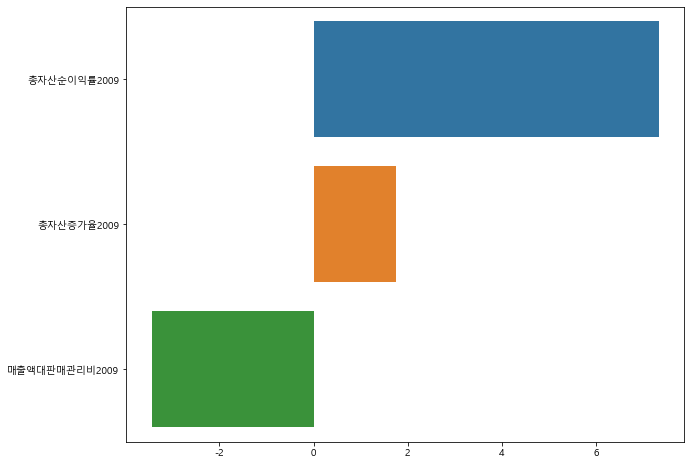

In [34]:
# 로지스틱 방식 사용시 회귀 트리의 COEF 파악
plt.rcParams["figure.figsize"] = (10,8)
feature_series = pd.Series(data = lg_clf.coef_[0], index=X_train.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)
print(feature_series)


샘플 추출을 위한 임곗값 배열의 index :  [ 1  6 11 16 21 26 31]
샘플 index로 추출한 임곗값 :  [0.91 0.69 0.54 0.47 0.36 0.29 0.15]
샘플 임곗값별 FPR :  [0.    0.049 0.122 0.244 0.39  0.561 0.732]
샘플 임곗값별 TPR :  [0.05  0.25  0.65  0.7   0.8   0.9   0.975]
ROC_AUC Score : 0.8015


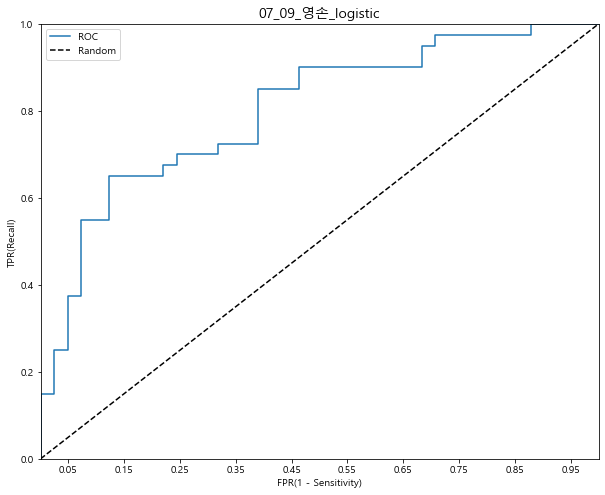

In [69]:
from sklearn.metrics import roc_curve, roc_auc_score


pred_proba_class1 = lg_clf.predict_proba(X_test)[:,1]
# lg_clf 부분은 모델마다 해당 모델을 지정하는 변수를 적으면 됩니다.

roc_auc = roc_auc_score(y_test, y_pred)

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 임계값 배열에서 샘플로 데이터를 추출하되, 임곗값을 5 step으로 추출
# thresholds[0]은 max(예측확률) + 1로 임의 설정된다.
# 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index : ', thr_index)
print('샘플 index로 추출한 임곗값 : ', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임곗값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR : ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR : ', np.round(tprs[thr_index], 3))

def roc_curve_plot(y_test, pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환받음
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    # ROC 곡선 그래프 곡선으로 그림
    plt.plot(fprs, tprs, label='ROC')
    # 가운데 대각선 직선을 그림
    plt.plot([0,1],[0,1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X, Y 축 명 설정 등
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1); plt.ylim(0, 1)
    plt.xlabel('FPR(1 - Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.title('07_09_영손_logistic',fontdict={'fontsize':14})
    # 여기에 '기간_기업분류기준(ex:영손,이자)_모델이름'이런 식으로 작성해 주세요.
    

roc_curve_plot(y_test, pred_proba_class1)
print(f'ROC_AUC Score : {roc_auc:.4f}')

In [60]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train,y_train)
y_pred = xgb_clf.predict(X_test)

params =  {'n_estimators' : [10,100,1000], 'learning_rate':[0.01,0.1,0.5], 'max_depth' : [3,4,5,6], 'min_child_weight' : [1,2], 'gamma' : [0,1,2]}



grid_tree = GridSearchCV(xgb_clf, param_grid=params, cv=7, refit=True,scoring='f1')
grid_tree.fit(X, y)

print('best parameters : ', grid_tree.best_params_)
print('best score : ', grid_tree.best_score_)


best parameters :  {'gamma': 0, 'learning_rate': 0.5, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 10}
best score :  0.7449774767352694


In [70]:

xgb_clf = XGBClassifier(gamma=0, learning_rate=0.5, max_depth=3, min_child_weight=1, n_estimators=10)
xgb_clf.fit(X_train,y_train)
y_pred = xgb_clf.predict(X_test)

acc_score = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('### XGB Classifier 분류 결과 ###')
print(f'ACC : {acc_score:.4f}')
print(f'Precision : {precision:.4f}')
print(f'Recall : {recall:.4f}')
print(f'f1 : {f1:.4f}')

### XGB Classifier 분류 결과 ###
ACC : 0.8025
Precision : 0.8529
Recall : 0.7250
f1 : 0.7838


Index([], dtype='object')


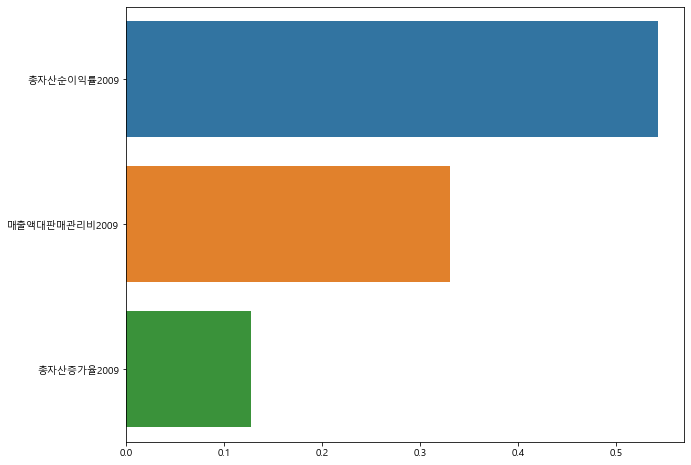

In [71]:
# XGB 방식 사용시 회귀 트리의 피쳐 중요도 파악
plt.rcParams["figure.figsize"] = (10,8)
feature_series = pd.Series(data = xgb_clf.feature_importances_, index=X_train.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)
print(feature_series.index[feature_series<=0.01])

샘플 추출을 위한 임곗값 배열의 index :  [ 1  6 11 16 21 26 31]
샘플 index로 추출한 임곗값 :  [0.95 0.9  0.69 0.49 0.32 0.08 0.05]
샘플 임곗값별 FPR :  [0.    0.024 0.073 0.171 0.317 0.61  0.829]
샘플 임곗값별 TPR :  [0.025 0.25  0.625 0.75  0.875 0.925 0.95 ]
ROC_AUC Score : 0.8015


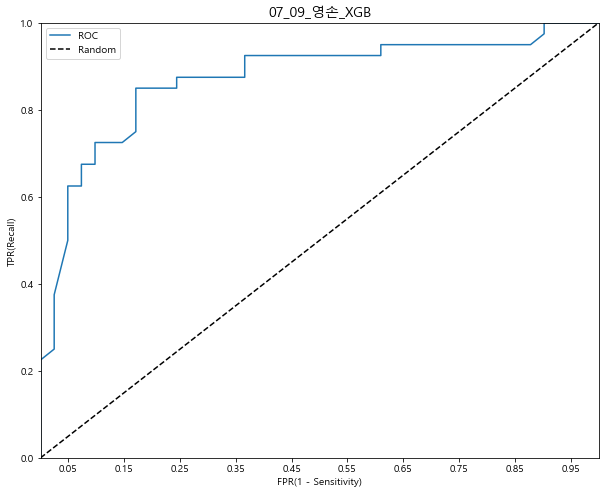

In [72]:
from sklearn.metrics import roc_curve, roc_auc_score


pred_proba_class1 = xgb_clf.predict_proba(X_test)[:,1]
# xgb_clf 부분은 모델마다 해당 모델을 지정하는 변수를 적으면 됩니다.

roc_auc = roc_auc_score(y_test, y_pred)

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 임계값 배열에서 샘플로 데이터를 추출하되, 임곗값을 5 step으로 추출
# thresholds[0]은 max(예측확률) + 1로 임의 설정된다.
# 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index : ', thr_index)
print('샘플 index로 추출한 임곗값 : ', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임곗값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR : ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR : ', np.round(tprs[thr_index], 3))

def roc_curve_plot(y_test, pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환받음
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    # ROC 곡선 그래프 곡선으로 그림
    plt.plot(fprs, tprs, label='ROC')
    # 가운데 대각선 직선을 그림
    plt.plot([0,1],[0,1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X, Y 축 명 설정 등
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1); plt.ylim(0, 1)
    plt.xlabel('FPR(1 - Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.title('07_09_영손_XGB',fontdict={'fontsize':14})
    # 여기에 '기간_기업분류기준(ex:영손,이자)_모델이름'이런 식으로 작성해 주세요.
    

roc_curve_plot(y_test, pred_proba_class1)
print(f'ROC_AUC Score : {roc_auc:.4f}')

# Decision tree

In [53]:
# GridSearchCV를 통한 회귀나무의 회귀의 최적 하이퍼 파라미터 찾기
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=9)

params = {'max_depth' : [2,3,4,5,6,7,8], 'min_samples_split':[1,2,3,4,5], 'max_features' : ['auto', 'sqrt', 'log2']}

grid_clf = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=7)
grid_clf1 = GridSearchCV(dt_clf, param_grid=params, scoring='f1', cv=7)
grid_clf.fit(X,y)
grid_clf1.fit(X,y)
print(f'최적 하이퍼 파라미터 : {grid_clf.best_params_}, 최적 평균 정확도 : {np.round(grid_clf.best_score_,4)}')
print(f'최적 하이퍼 파라미터 : {grid_clf1.best_params_}, 최적 평균 F1스코어 : {np.round(grid_clf1.best_score_,4)}')

최적 하이퍼 파라미터 : {'max_depth': 5, 'max_features': 'auto', 'min_samples_split': 4}, 최적 평균 정확도 : 0.733
최적 하이퍼 파라미터 : {'max_depth': 3, 'max_features': 'auto', 'min_samples_split': 2}, 최적 평균 F1스코어 : 0.7235


In [54]:
# 파라미터 튜닝 후 다시 회귀나무

dt_clf = DecisionTreeClassifier(max_depth=3, max_features='auto', min_samples_split=2, random_state=9)
dt_clf.fit(X_train,y_train)
y_pred = dt_clf.predict(X_test)

acc_score = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('### Decision classifier 분류 결과 ###')
print(f'ACC : {acc_score:.4f}')
print(f'Precision : {precision:.4f}')
print(f'Recall : {recall:.4f}')
print(f'F1 Score : {f1:.4f}')

### Decision classifier 분류 결과 ###
ACC : 0.7284
Precision : 0.6957
Recall : 0.8000
F1 Score : 0.7442


샘플 추출을 위한 임곗값 배열의 index :  [1 6]
샘플 index로 추출한 임곗값 :  [0.85 0.07]
샘플 임곗값별 FPR :  [0.098 0.683]
샘플 임곗값별 TPR :  [0.425 0.95 ]
ROC_AUC Score : 0.8015


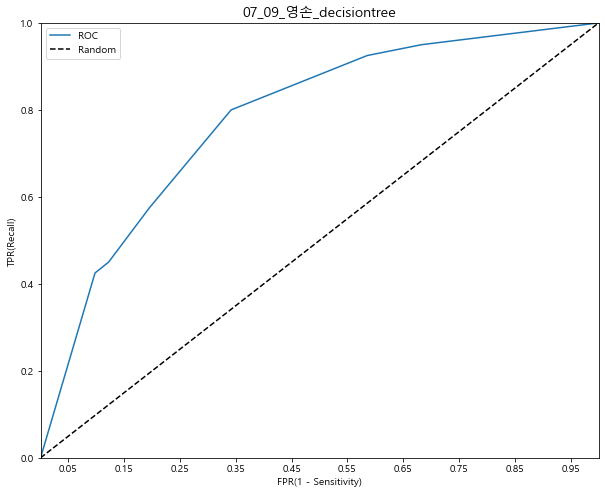

In [73]:
from sklearn.metrics import roc_curve, roc_auc_score


pred_proba_class1 = dt_clf.predict_proba(X_test)[:,1]
# dt_clf 부분은 모델마다 해당 모델을 지정하는 변수를 적으면 됩니다.

roc_auc = roc_auc_score(y_test, y_pred)

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 임계값 배열에서 샘플로 데이터를 추출하되, 임곗값을 5 step으로 추출
# thresholds[0]은 max(예측확률) + 1로 임의 설정된다.
# 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index : ', thr_index)
print('샘플 index로 추출한 임곗값 : ', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임곗값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR : ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR : ', np.round(tprs[thr_index], 3))

def roc_curve_plot(y_test, pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환받음
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    # ROC 곡선 그래프 곡선으로 그림
    plt.plot(fprs, tprs, label='ROC')
    # 가운데 대각선 직선을 그림
    plt.plot([0,1],[0,1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X, Y 축 명 설정 등
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1); plt.ylim(0, 1)
    plt.xlabel('FPR(1 - Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.title('07_09_영손_decisiontree',fontdict={'fontsize':14})
    # 여기에 '기간_기업분류기준(ex:영손,이자)_모델이름'이런 식으로 작성해 주세요.
    

roc_curve_plot(y_test, pred_proba_class1)
print(f'ROC_AUC Score : {roc_auc:.4f}')

In [55]:
# GridSearchCV를 통한 RF의 최적 하이퍼 파라미터 찾기
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=9)

# params = {'n_estimators' : [10,100,500,1000,10000], 'min_samples_leaf':[1,2,3,4,5], 'max_features' : ['auto', 'sqrt', 'log2'], 'criterion' : ['gini', 'entropy', 'log_loss']}
params = {'n_estimators' : [10,100,1000], 'min_samples_leaf':[2,3,4]}
grid_clf = GridSearchCV(rf_clf, param_grid=params, scoring='accuracy', cv=7)
grid_clf1 = GridSearchCV(rf_clf, param_grid=params, scoring='f1', cv=7)
grid_clf.fit(X,y)
grid_clf1.fit(X,y)
print(f'최적 하이퍼 파라미터 : {grid_clf.best_params_}, 최적 평균 정확도 : {np.round(grid_clf.best_score_,4)}')
print(f'최적 하이퍼 파라미터 : {grid_clf1.best_params_}, 최적 평균 F1스코어 : {np.round(grid_clf1.best_score_,4)}')

최적 하이퍼 파라미터 : {'min_samples_leaf': 4, 'n_estimators': 1000}, 최적 평균 정확도 : 0.7406
최적 하이퍼 파라미터 : {'min_samples_leaf': 3, 'n_estimators': 100}, 최적 평균 F1스코어 : 0.7164


In [75]:
# 파라미터 튜닝 후 다시 회귀나무

rf_clf = RandomForestClassifier(n_estimators=100, min_samples_leaf=3, random_state=9)
rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_test)

acc_score = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('### RandomForest classifier 분류 결과 ###')
print(f'ACC : {acc_score:.4f}')
print(f'Precision : {precision:.4f}')
print(f'Recall : {recall:.4f}')
print(f'F1 Score : {f1:.4f}')

### RandomForest classifier 분류 결과 ###
ACC : 0.8025
Precision : 0.8000
Recall : 0.8000
F1 Score : 0.8000


샘플 추출을 위한 임곗값 배열의 index :  [ 1  6 11 16 21 26]
샘플 index로 추출한 임곗값 :  [0.97 0.84 0.68 0.46 0.32 0.07]
샘플 임곗값별 FPR :  [0.    0.024 0.073 0.244 0.317 0.756]
샘플 임곗값별 TPR :  [0.025 0.375 0.65  0.8   0.9   1.   ]
ROC_AUC Score : 0.8024


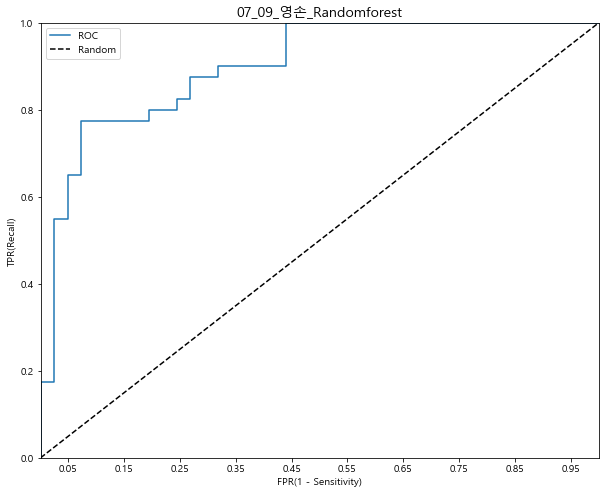

In [76]:
from sklearn.metrics import roc_curve, roc_auc_score


pred_proba_class1 = rf_clf.predict_proba(X_test)[:,1]
# rf_clf 부분은 모델마다 해당 모델을 지정하는 변수를 적으면 됩니다.

roc_auc = roc_auc_score(y_test, y_pred)

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 임계값 배열에서 샘플로 데이터를 추출하되, 임곗값을 5 step으로 추출
# thresholds[0]은 max(예측확률) + 1로 임의 설정된다.
# 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index : ', thr_index)
print('샘플 index로 추출한 임곗값 : ', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임곗값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR : ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR : ', np.round(tprs[thr_index], 3))

def roc_curve_plot(y_test, pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환받음
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    # ROC 곡선 그래프 곡선으로 그림
    plt.plot(fprs, tprs, label='ROC')
    # 가운데 대각선 직선을 그림
    plt.plot([0,1],[0,1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X, Y 축 명 설정 등
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1); plt.ylim(0, 1)
    plt.xlabel('FPR(1 - Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.title('07_09_영손_Randomforest',fontdict={'fontsize':14})
    # 여기에 '기간_기업분류기준(ex:영손,이자)_모델이름'이런 식으로 작성해 주세요.
    

roc_curve_plot(y_test, pred_proba_class1)
print(f'ROC_AUC Score : {roc_auc:.4f}')

In [58]:
# GridSearchCV를 통한 SVM의 최적 하이퍼 파라미터 찾기
from sklearn import svm

svm_clf = svm.SVC(random_state=9)

# params = {'n_estimators' : [10,100,500,1000,10000], 'min_samples_leaf':[1,2,3,4,5], 'max_features' : ['auto', 'sqrt', 'log2'], 'criterion' : ['gini', 'entropy', 'log_loss']}
params = {'C' : [1, 10, 100], 'kernel' : ['linear', 'poly', 'rbf'],  'gamma' : [0.001, 0.01, 0.1]}
grid_clf = GridSearchCV(svm_clf, param_grid=params, scoring='accuracy', cv=7)
grid_clf1 = GridSearchCV(svm_clf, param_grid=params, scoring='f1', cv=7)
grid_clf.fit(X,y)
grid_clf1.fit(X,y)
print(f'최적 하이퍼 파라미터 : {grid_clf.best_params_}, 최적 평균 정확도 : {np.round(grid_clf.best_score_,4)}')
print(f'최적 하이퍼 파라미터 : {grid_clf1.best_params_}, 최적 평균 F1스코어 : {np.round(grid_clf1.best_score_,4)}')

최적 하이퍼 파라미터 : {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}, 최적 평균 정확도 : 0.733
최적 하이퍼 파라미터 : {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}, 최적 평균 F1스코어 : 0.7277


In [78]:
# SVM 모델링
from sklearn import svm

svm_clf  = svm.SVC(random_state=9, C=100, gamma=0.1, kernel = 'rbf',probability=True)
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)

acc_score = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('### SVM classifier 분류 결과 ###')
print(f'ACC : {acc_score:.4f}')
print(f'Precision : {precision:.4f}')
print(f'Recall : {recall:.4f}')
print(f'F1 Score : {f1:.4f}')

### SVM classifier 분류 결과 ###
ACC : 0.7284
Precision : 0.7250
Recall : 0.7250
F1 Score : 0.7250


샘플 추출을 위한 임곗값 배열의 index :  [ 1  6 11 16 21 26 31]
샘플 index로 추출한 임곗값 :  [0.81 0.71 0.65 0.48 0.35 0.26 0.1 ]
샘플 임곗값별 FPR :  [0.    0.024 0.098 0.268 0.439 0.634 0.805]
샘플 임곗값별 TPR :  [0.025 0.25  0.425 0.7   0.825 0.9   0.975]
ROC_AUC Score : 0.7284


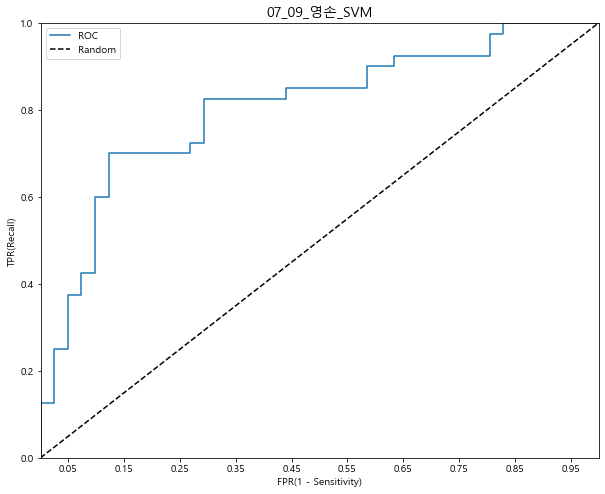

In [79]:
from sklearn.metrics import roc_curve, roc_auc_score


pred_proba_class1 = svm_clf.predict_proba(X_test)[:,1]
# svm_clf 부분은 모델마다 해당 모델을 지정하는 변수를 적으면 됩니다.

roc_auc = roc_auc_score(y_test, y_pred)

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 임계값 배열에서 샘플로 데이터를 추출하되, 임곗값을 5 step으로 추출
# thresholds[0]은 max(예측확률) + 1로 임의 설정된다.
# 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index : ', thr_index)
print('샘플 index로 추출한 임곗값 : ', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임곗값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR : ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR : ', np.round(tprs[thr_index], 3))

def roc_curve_plot(y_test, pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환받음
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    # ROC 곡선 그래프 곡선으로 그림
    plt.plot(fprs, tprs, label='ROC')
    # 가운데 대각선 직선을 그림
    plt.plot([0,1],[0,1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X, Y 축 명 설정 등
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1); plt.ylim(0, 1)
    plt.xlabel('FPR(1 - Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.title('07_09_영손_SVM',fontdict={'fontsize':14})
    # 여기에 '기간_기업분류기준(ex:영손,이자)_모델이름'이런 식으로 작성해 주세요.
    

roc_curve_plot(y_test, pred_proba_class1)
print(f'ROC_AUC Score : {roc_auc:.4f}')

In [80]:
from sklearn.neighbors import KNeighborsClassifier

# GridSearchCV를 통한 kNN의 최적 하이퍼 파라미터 찾기

knn_clf = KNeighborsClassifier()

# params = {'n_estimators' : [10,100,500,1000,10000], 'min_samples_leaf':[1,2,3,4,5], 'max_features' : ['auto', 'sqrt', 'log2'], 'criterion' : ['gini', 'entropy', 'log_loss']}
params = {'n_neighbors' : [3, 4, 5, 6], 'p': [1,2], 'weights' : ['uniform', 'distance'] }
grid_clf = GridSearchCV(knn_clf, param_grid=params, scoring='accuracy', cv=7)
grid_clf1 = GridSearchCV(knn_clf, param_grid=params, scoring='f1', cv=7)
grid_clf.fit(X,y)
grid_clf1.fit(X,y)
print(f'최적 하이퍼 파라미터 : {grid_clf.best_params_}, 최적 평균 정확도 : {np.round(grid_clf.best_score_,4)}')
print(f'최적 하이퍼 파라미터 : {grid_clf1.best_params_}, 최적 평균 F1스코어 : {np.round(grid_clf1.best_score_,4)}')

최적 하이퍼 파라미터 : {'n_neighbors': 4, 'p': 2, 'weights': 'uniform'}, 최적 평균 정확도 : 0.7429
최적 하이퍼 파라미터 : {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}, 최적 평균 F1스코어 : 0.7106


In [81]:

knn_clf = KNeighborsClassifier(n_neighbors=3, p = 1, weights='uniform')
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)

acc_score = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('### kNN classifier 분류 결과 ###')
print(f'ACC : {acc_score:.4f}')
print(f'Precision : {precision:.4f}')
print(f'Recall : {recall:.4f}')
print(f'F1 Score : {f1:.4f}')

### kNN classifier 분류 결과 ###
ACC : 0.7531
Precision : 0.7273
Recall : 0.8000
F1 Score : 0.7619


샘플 추출을 위한 임곗값 배열의 index :  [1]
샘플 index로 추출한 임곗값 :  [1.]
샘플 임곗값별 FPR :  [0.073]
샘플 임곗값별 TPR :  [0.6]
ROC_AUC Score : 0.7537


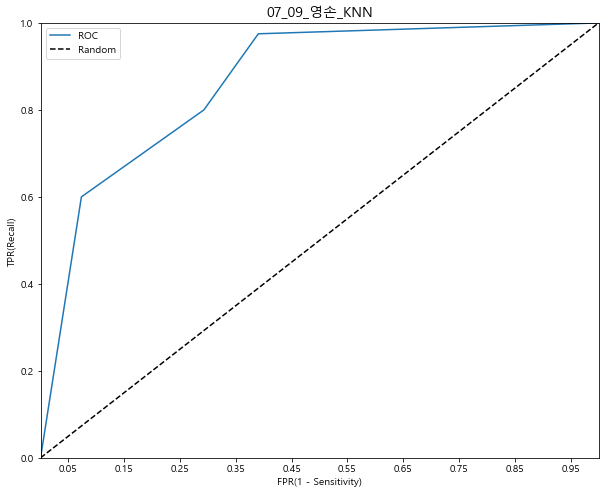

In [82]:
from sklearn.metrics import roc_curve, roc_auc_score


pred_proba_class1 = knn_clf.predict_proba(X_test)[:,1]
# knn_clf 부분은 모델마다 해당 모델을 지정하는 변수를 적으면 됩니다.

roc_auc = roc_auc_score(y_test, y_pred)

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 임계값 배열에서 샘플로 데이터를 추출하되, 임곗값을 5 step으로 추출
# thresholds[0]은 max(예측확률) + 1로 임의 설정된다.
# 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index : ', thr_index)
print('샘플 index로 추출한 임곗값 : ', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임곗값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR : ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR : ', np.round(tprs[thr_index], 3))

def roc_curve_plot(y_test, pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환받음
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    # ROC 곡선 그래프 곡선으로 그림
    plt.plot(fprs, tprs, label='ROC')
    # 가운데 대각선 직선을 그림
    plt.plot([0,1],[0,1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X, Y 축 명 설정 등
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1); plt.ylim(0, 1)
    plt.xlabel('FPR(1 - Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.title('07_09_영손_KNN',fontdict={'fontsize':14})
    # 여기에 '기간_기업분류기준(ex:영손,이자)_모델이름'이런 식으로 작성해 주세요.
    

roc_curve_plot(y_test, pred_proba_class1)
print(f'ROC_AUC Score : {roc_auc:.4f}')